## Multi-centre Study Data Harzonization and Visualization Project

#### Q1. Read and create a subset of the xtrfxnd dataframe by selecting only these variables of interest:

['id', 't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd', 't_moart', 'r_moart', 'hicnum', 'centre', 'age', 'osteomed', 'newosteofx', 'prevfx_any']

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
#Read in Dataframe
xtrtmp = pd.read_sas(r'C:\Users\abdul\Downloads\xtrfxnd.sas7bdat',format='sas7bdat')

In [3]:
#Convert all column names to lowercase
xtrtmp.columns = xtrtmp.columns.str.lower()

In [4]:
varstokeep = ['id', 't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd', 't_moart', 'r_moart', 'hicnum', 'centre', 'age', 'osteomed', 'newosteofx', 'prevfx_any']
xtrtmp = xtrtmp[varstokeep]
xtrtmp

,id,t_ttbmd,t_ctbmd,r_ttbmd,r_ctbmd,t_moart,r_moart,hicnum,centre,age,osteomed,newosteofx,prevfx_any
0,891.0,160.3830,805.1053,143.8562,846.2466,1.0,3.0,b'CA',1.0,75.0,1.0,0.0,1.0
1,892.0,160.3830,805.1053,143.8562,846.2466,1.0,3.0,b'CA',1.0,75.0,1.0,0.0,1.0
2,893.0,281.8728,799.4792,373.8253,925.3645,1.0,4.0,b'CA',1.0,69.0,0.0,0.0,1.0
3,894.0,253.3904,813.7205,207.3262,903.0356,1.0,2.0,b'CA',1.0,69.0,0.0,0.0,1.0
4,895.0,302.2676,873.6742,297.8722,911.6506,1.0,1.0,b'CA',1.0,78.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1421.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,b'VR',5.0,70.0,0.0,0.0,0.0
1227,1422.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,b'VR',5.0,70.0,0.0,0.0,0.0
1228,1423.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,b'VR',5.0,70.0,0.0,0.0,0.0
1229,1424.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,b'VR',5.0,70.0,0.0,0.0,0.0


In [5]:
#Decode the data
xtrtmp['hicnum'] = xtrtmp['hicnum'].str.decode('utf-8')

#### Q2. Do a frequency count for 'hicnum' and 'centre'.

In [6]:
xtrtmp['hicnum'].value_counts()

CA    352
TO    292
VR    225
HA    200
SK    161
Name: hicnum, dtype: int64

In [7]:
xtrtmp['centre'].value_counts()

1.0    352
4.0    292
5.0    225
2.0    200
3.0    161
Name: centre, dtype: int64

#### Q3. a) Create a new variable called 'sitename', which serves as a proper label for the study site names. Base this off the 2 variables: CENTRE and HICNUM (according to the key below). 

1 or CA = "Calgary" 

4 or TO = "Toronto - Referent"

5 or VR = "Vancouver"

2 or HA = "Hamilton"

3 or SK = "Saskatoon"

(If it fits none of these sites, just let it be missing)

In [27]:
xtrtmp['sitename'] = np.where((xtrtmp['centre'] == 1.0) | (xtrtmp['hicnum'] == 'CA'), 'Calgary', 
                     np.where((xtrtmp['centre'] == 2.0) | (xtrtmp['hicnum'] == 'HA'), 'Hamilton', 
                     np.where((xtrtmp['centre'] == 3.0) | (xtrtmp['hicnum'] == 'SK'), 'Saskatoon', 
                     np.where((xtrtmp['centre'] == 4.0) | (xtrtmp['hicnum'] == 'TO'), 'Toronto - Referent', 
                     np.where((xtrtmp['centre'] == 5.0) | (xtrtmp['hicnum'] == 'VA'), 'Vancouver', np.NaN)))))

In [9]:
xtrtmp

,id,t_ttbmd,t_ctbmd,r_ttbmd,r_ctbmd,t_moart,r_moart,hicnum,centre,age,osteomed,newosteofx,prevfx_any,sitename
0,891.0,160.3830,805.1053,143.8562,846.2466,1.0,3.0,CA,1.0,75.0,1.0,0.0,1.0,Calgary
1,892.0,160.3830,805.1053,143.8562,846.2466,1.0,3.0,CA,1.0,75.0,1.0,0.0,1.0,Calgary
2,893.0,281.8728,799.4792,373.8253,925.3645,1.0,4.0,CA,1.0,69.0,0.0,0.0,1.0,Calgary
3,894.0,253.3904,813.7205,207.3262,903.0356,1.0,2.0,CA,1.0,69.0,0.0,0.0,1.0,Calgary
4,895.0,302.2676,873.6742,297.8722,911.6506,1.0,1.0,CA,1.0,78.0,1.0,0.0,1.0,Calgary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1421.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,VR,5.0,70.0,0.0,0.0,0.0,Vancouver
1227,1422.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,VR,5.0,70.0,0.0,0.0,0.0,Vancouver
1228,1423.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,VR,5.0,70.0,0.0,0.0,0.0,Vancouver
1229,1424.0,266.3000,690.8000,350.9000,779.6000,2.0,3.0,VR,5.0,70.0,0.0,0.0,0.0,Vancouver


#### Q3. b) Run another frequency procedure on the new 'sitename' variable to check if you did this correctly. 

In [10]:
xtrtmp['sitename'].value_counts()

Calgary               352
Toronto - Referent    292
Vancouver             225
Hamilton              200
Saskatoon             161
nan                     1
Name: sitename, dtype: int64

#### Q4. a) Create a boxplot of how t_ttbmd varies by site

Add a title and axis labels - change font size to be bigger
Also make the figure larger: 12 x 6
Compare side by side those with and without a prevalent fracture (prevfx_any)

<Figure size 1200x600 with 0 Axes>

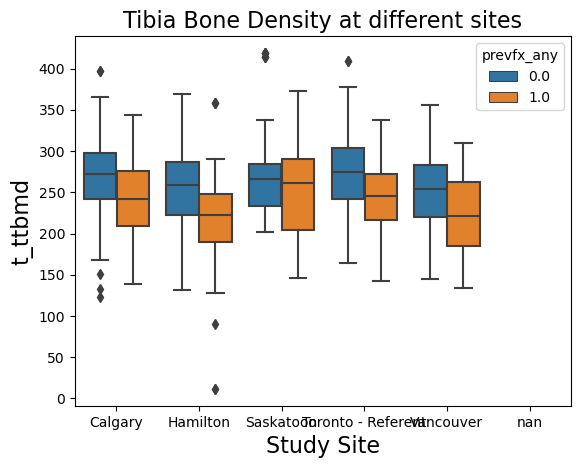

<Figure size 1200x600 with 0 Axes>

In [11]:
#Plot t_ttbmd by site
s.boxplot(data=xtrtmp, x='sitename', y='t_ttbmd', hue='prevfx_any')
plt.title('Tibia Bone Density at different sites', fontsize = 16)
plt.xlabel('Study Site',fontsize = 16)
plt.ylabel('t_ttbmd',fontsize = 16)
plt.figure(figsize=(12,6))

#### Q4. b) Determine the distribution (frequencies) of motion grades (t_moart and r_moart)

In [12]:
xtrtmp['t_moart'].value_counts()

1.0    847
2.0    271
3.0     60
4.0      5
5.0      3
Name: t_moart, dtype: int64

In [13]:
xtrtmp['r_moart'].value_counts()

2.0    567
3.0    270
1.0    264
4.0     55
5.0     22
Name: r_moart, dtype: int64

#### Q4.c) Repeat the boxplot exercise from Q4 a) but using a subsetted dataframe looking only at motion artifact (t_moart) grades 3 and above

In [14]:
#Create a subset of data with t_moart >=3
xtrtmp_m3 = xtrtmp[xtrtmp['t_moart'] >= 3]

<Figure size 1200x600 with 0 Axes>

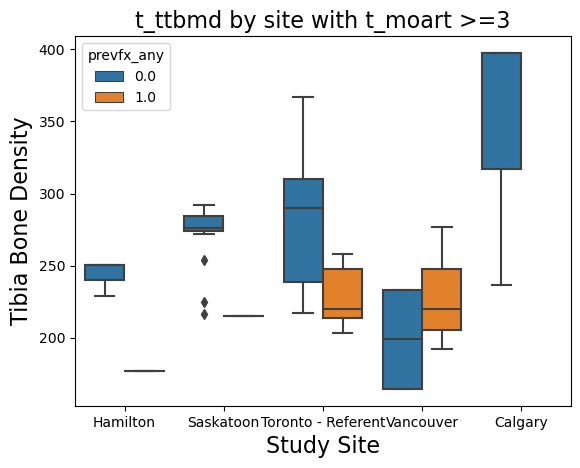

<Figure size 1200x600 with 0 Axes>

In [15]:
#Plot t_ttbmd by site
s.boxplot(data=xtrtmp_m3, x='sitename', y='t_ttbmd', hue='prevfx_any', )
plt.title('t_ttbmd by site with t_moart >=3', fontsize=16)
plt.xlabel('Study Site', fontsize=16)
plt.ylabel('Tibia Bone Density', fontsize=16)
plt.figure(figsize =(12,6))

#### Q5. Create a scatterplot of how t_ttbmd relates to age
Add a title and axis labels - change font size to be bigger.

Also make the figure 12 x 6.

Label the points by whether they had a new osteoporotic fracture or not (newosteofx)

<Figure size 1200x600 with 0 Axes>

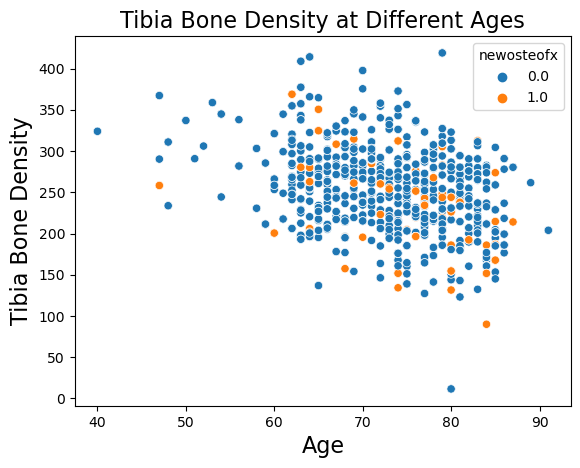

<Figure size 1200x600 with 0 Axes>

In [29]:
#Plot t_ttbmd by age
s.scatterplot(data=xtrtmp, x='age', y='t_ttbmd', hue='newosteofx')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Tibia Bone Density',fontsize=16)
plt.title('Tibia Bone Density at Different Ages', fontsize=16)
plt.figure(figsize=(12,6))

#### Q6. a) Create new cross-calibrated values for all sites' 't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd' values according to this table.
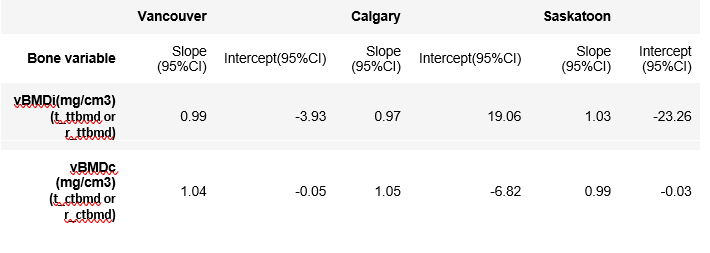

In [17]:
xtrtmp.sort_values(by=['centre'])

,id,t_ttbmd,t_ctbmd,r_ttbmd,r_ctbmd,t_moart,r_moart,hicnum,centre,age,osteomed,newosteofx,prevfx_any,sitename
0,891.0,160.3830,805.1053,143.8562,846.2466,1.0,3.0,CA,1.0,75.0,1.0,0.0,1.0,Calgary
505,342.0,248.8014,712.6703,251.4280,762.5769,1.0,1.0,CA,1.0,81.0,1.0,0.0,0.0,Calgary
506,343.0,248.8014,712.6703,251.4280,762.5769,1.0,1.0,CA,1.0,81.0,1.0,0.0,0.0,Calgary
507,344.0,244.9489,730.1814,283.9987,827.3680,1.0,1.0,CA,1.0,81.0,1.0,0.0,0.0,Calgary
508,345.0,272.2662,756.6232,278.5703,878.3253,1.0,1.0,CA,1.0,83.0,1.0,0.0,0.0,Calgary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,814.0,274.4000,715.7000,294.6000,799.1000,1.0,1.0,VR,5.0,69.0,0.0,0.0,0.0,Vancouver
974,813.0,179.5000,666.2000,256.2000,700.0000,1.0,3.0,VR,5.0,81.0,1.0,0.0,0.0,Vancouver
983,822.0,211.0000,689.2000,196.5000,640.1000,2.0,2.0,VR,5.0,66.0,1.0,0.0,0.0,Vancouver
1230,1425.0,145.0000,374.6000,226.6000,639.4000,2.0,2.0,VR,5.0,85.0,0.0,0.0,0.0,Vancouver


In [18]:
df = pd.DataFrame([["Toronto - Referent","Hamilton","Vancouver","Calgary","Saskatoon"],
[1,1,0.99,0.97,1.03],
[0,0,-3.93,19.06,-23.26],
[1,1,1.04,1.05,0.99],
[0,0,-0.05,-6.82,-0.03]])
df = df.T
df.columns = ('sitename', 'slope1', 'intercept1', 'slope2', 'intercept2')

In [19]:
xtrtmp = xtrtmp.merge(df, on='sitename', how='inner')

In [20]:
xtrtmp['t_ttbmd_new'] = xtrtmp['t_ttbmd'] * xtrtmp['slope1'] + xtrtmp['intercept1'] 
xtrtmp['r_ttbmd_new'] = xtrtmp['r_ttbmd'] * xtrtmp['slope1'] + xtrtmp['intercept1'] 
xtrtmp['t_ctbmd_new'] = xtrtmp['t_ctbmd'] * xtrtmp['slope2'] + xtrtmp['intercept2'] 
xtrtmp['r_ctbmd_new'] = xtrtmp['r_ctbmd'] * xtrtmp['slope2'] + xtrtmp['intercept2'] 

In [21]:
xtrtxp_new = xtrtmp[['t_ttbmd_new', 't_ctbmd_new', 'r_ttbmd_new', 'r_ctbmd_new']]
xtrtxp_new

,t_ttbmd_new,t_ctbmd_new,r_ttbmd_new,r_ctbmd_new
0,174.63151,838.540565,158.600514,881.73893
1,174.63151,838.540565,158.600514,881.73893
2,292.476616,832.63316,381.670541,964.812725
3,264.848688,847.586525,220.166414,941.36738
4,312.259572,910.53791,307.996034,950.41313
...,...,...,...,...
1225,259.707,718.382,343.461,810.734
1226,259.707,718.382,343.461,810.734
1227,259.707,718.382,343.461,810.734
1228,259.707,718.382,343.461,810.734


#### Q6. b) Create a 1 x 2 subplot containing 2 boxplots: 1 for before and 1 after calibration

[Text(0.5, 0, 'Site')]

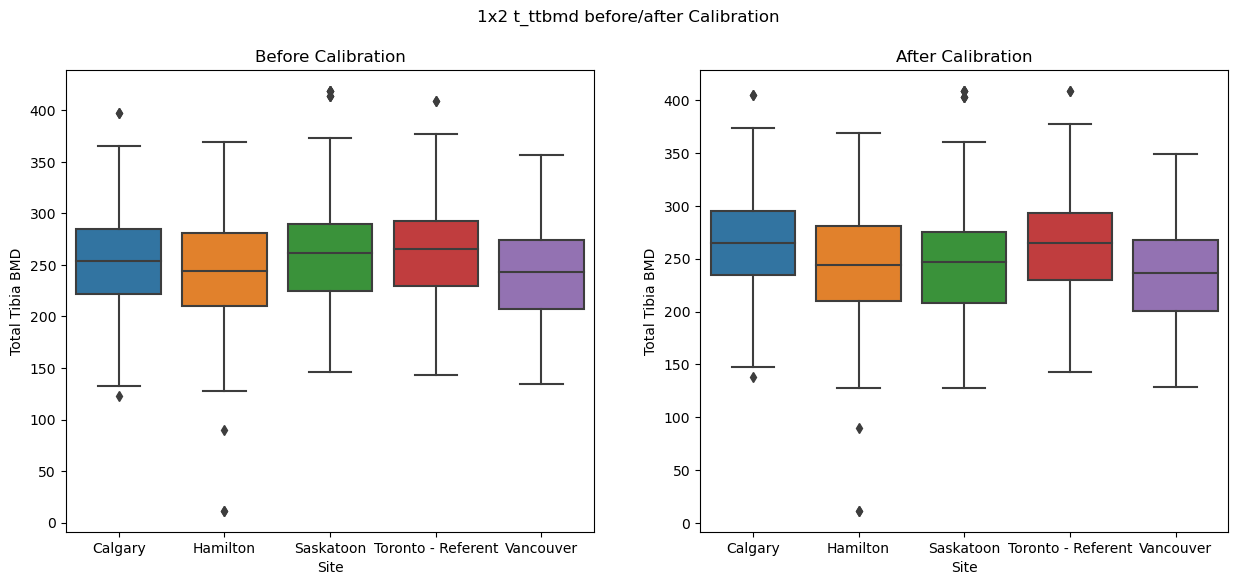

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2) 
s.boxplot(ax=ax1, data=xtrtmp, x='sitename', y='t_ttbmd') 
s.boxplot(ax=ax2, data=xtrtmp, x='sitename', y='t_ttbmd_new') 
fig.set_size_inches(15, 6)
fig.suptitle('1x2 t_ttbmd before/after Calibration')

ax1.set_title('Before Calibration')
plt.setp(ax1, ylabel='Total Tibia BMD')
plt.setp(ax1, xlabel='Site')

ax2.set_title('After Calibration')
plt.setp(ax2, ylabel='Total Tibia BMD')
plt.setp(ax2, xlabel='Site')

[Text(0.5, 0, 'Site')]

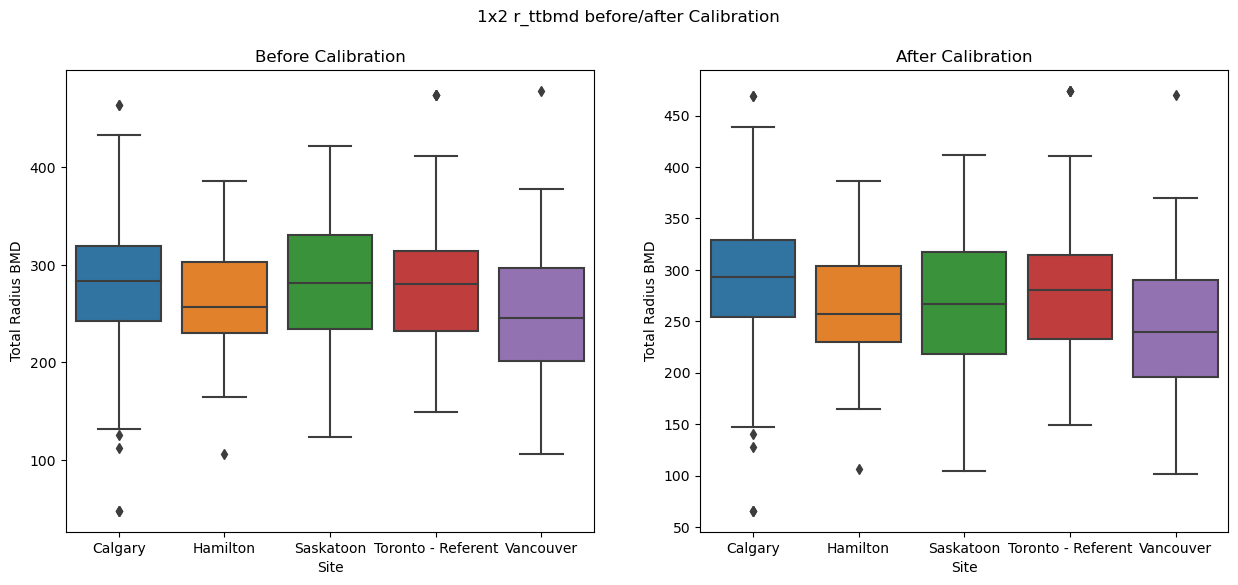

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2) 
s.boxplot(ax=ax1, data=xtrtmp, x='sitename', y='r_ttbmd') 
s.boxplot(ax=ax2, data=xtrtmp, x='sitename', y='r_ttbmd_new') 
fig.set_size_inches(15, 6)
fig.suptitle('1x2 r_ttbmd before/after Calibration')

ax1.set_title('Before Calibration')
plt.setp(ax1, ylabel='Total Radius BMD')
plt.setp(ax1, xlabel='Site')

ax2.set_title('After Calibration')
plt.setp(ax2, ylabel='Total Radius BMD')
plt.setp(ax2, xlabel='Site')

[Text(0.5, 0, 'Site')]

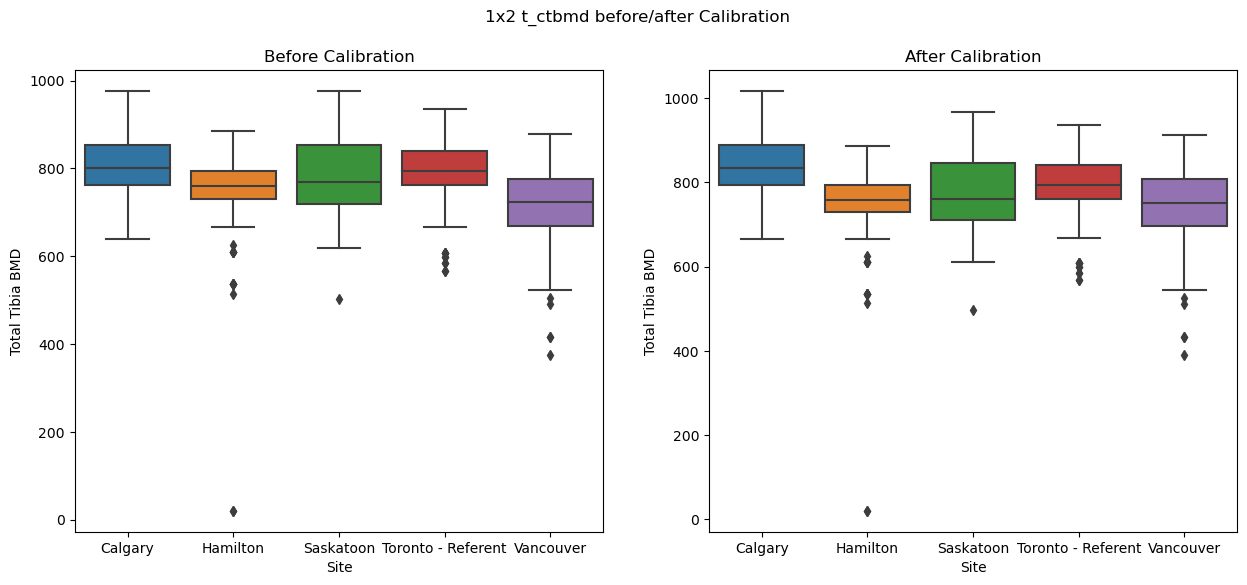

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2) 
s.boxplot(ax=ax1, data=xtrtmp, x='sitename', y='t_ctbmd') 
s.boxplot(ax=ax2, data=xtrtmp, x='sitename', y='t_ctbmd_new') 
fig.set_size_inches(15, 6)
fig.suptitle('1x2 t_ctbmd before/after Calibration')

ax1.set_title('Before Calibration')
plt.setp(ax1, ylabel='Total Tibia BMD')
plt.setp(ax1, xlabel='Site')

ax2.set_title('After Calibration')
plt.setp(ax2, ylabel='Total Tibia BMD')
plt.setp(ax2, xlabel='Site')

[Text(0.5, 0, 'Site')]

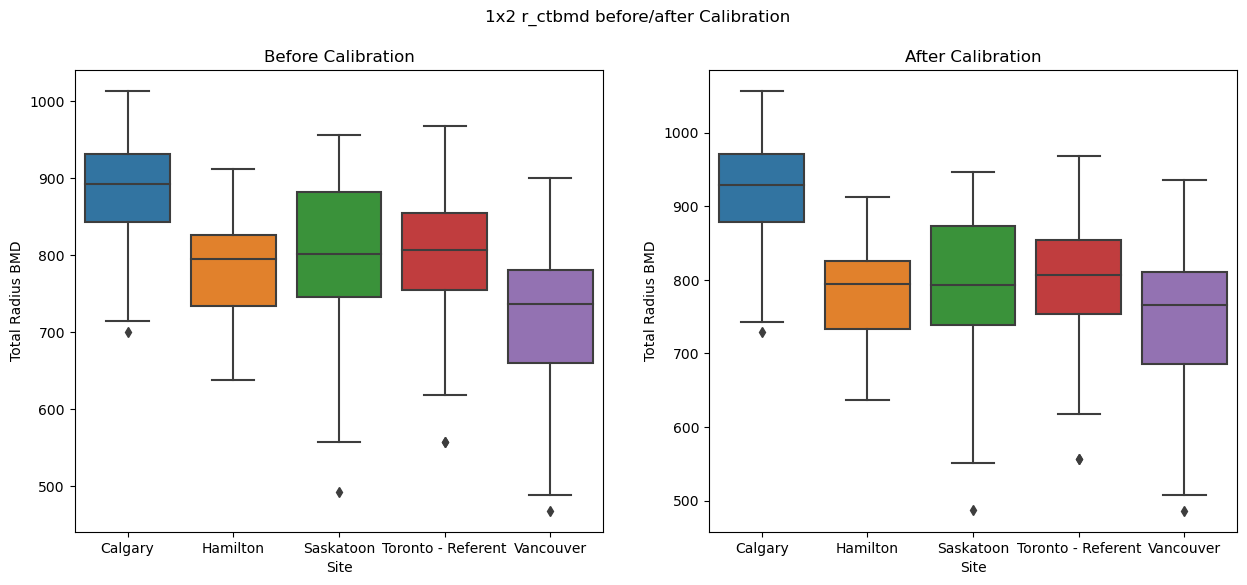

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2) 
s.boxplot(ax=ax1, data=xtrtmp, x='sitename', y='r_ctbmd') 
s.boxplot(ax=ax2, data=xtrtmp, x='sitename', y='r_ctbmd_new') 
fig.set_size_inches(15, 6)
fig.suptitle('1x2 r_ctbmd before/after Calibration')

ax1.set_title('Before Calibration')
plt.setp(ax1, ylabel='Total Radius BMD')
plt.setp(ax1, xlabel='Site')

ax2.set_title('After Calibration')
plt.setp(ax2, ylabel='Total Radius BMD')
plt.setp(ax2, xlabel='Site')